## Part 1: Strategy and Implementation

In [1]:
 # Generate synthetic data
def generate_articles(n=1000):
    categories = ['Politics', 'Technology', 'Sports', 'Entertainment', 'Business']
    articles = []
    for i in range(n):
        category = random.choice(categories)
        title = f"Article {i+1} about {category.lower()}"
        content = f"This is the content of article {i+1} discussing {category.lower()}. It contains information related to {category}."
        articles.append({'id': i+1, 'title': title, 'content': content, 'category': category})
    return pd.DataFrame(articles)

articles_df = generate_articles()

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(articles_df['content'])

# Article Recommender Bot
def article_recommender(user_profile=None, n_recommendations=10):
    if user_profile is None:
        # Explore: Return random articles if no user profile
        return articles_df.sample(n=n_recommendations)
    else:
        # Exploit: Use user profile to recommend similar articles
        user_vector = tfidf.transform([user_profile])
        sim_scores = cosine_similarity(user_vector, tfidf_matrix)
        top_indices = sim_scores.argsort()[0][-n_recommendations:][::-1]
        return articles_df.iloc[top_indices]

# User Profiler Bot
def user_profiler(clickstream_data):
    clicked_articles = clickstream_data[clickstream_data['Click'] == 'Yes']
    if not clicked_articles.empty:
        user_interests = articles_df[articles_df['id'].isin(clicked_articles['ArticleID'])]['category'].value_counts().to_dict()
        return ' '.join([f"{category} " * count for category, count in user_interests.items()])
    return None

# Simulation of user interaction
def simulate_user_interaction(n_users=100, n_sessions=5):
    clickstream_data = []
    for user_id in range(1, n_users+1):
        user_profile = None
        for session_id in range(1, n_sessions+1):
            recommended_articles = article_recommender(user_profile)
            for rank, (_, article) in enumerate(recommended_articles.iterrows(), 1):
                click = random.choice(['Yes', 'No'])
                time_spent = random.randint(0, 120) if click == 'Yes' else 0
                clickstream_data.append({
                    'UserId': user_id,
                    'SessionID': session_id,
                    'ArticleID': article['id'],
                    'Served Article Rank': rank,
                    'Click': click,
                    'Time Spent (seconds)': time_spent
                })
            user_profile = user_profiler(pd.DataFrame(clickstream_data))
    return pd.DataFrame(clickstream_data)

# Run simulation
clickstream_df = simulate_user_interaction()
print(clickstream_df.head())

   UserId  SessionID  ArticleID  Served Article Rank Click  \
0       1          1        615                    1    No   
1       1          1        419                    2    No   
2       1          1        573                    3    No   
3       1          1        390                    4    No   
4       1          1        181                    5    No   

   Time Spent (seconds)  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  


## Midway report
### we've added functions to analyze the performance of our recommender system. We're calculating and visualizing clickthrough rates across sessions and user engagement distribution. This helps us understand how well our system is performing and how users are interacting with the recommended articles.

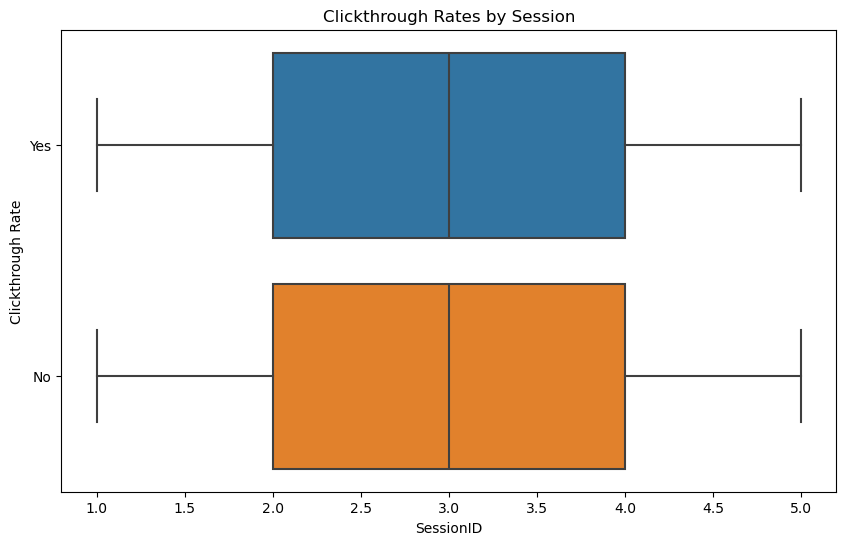

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


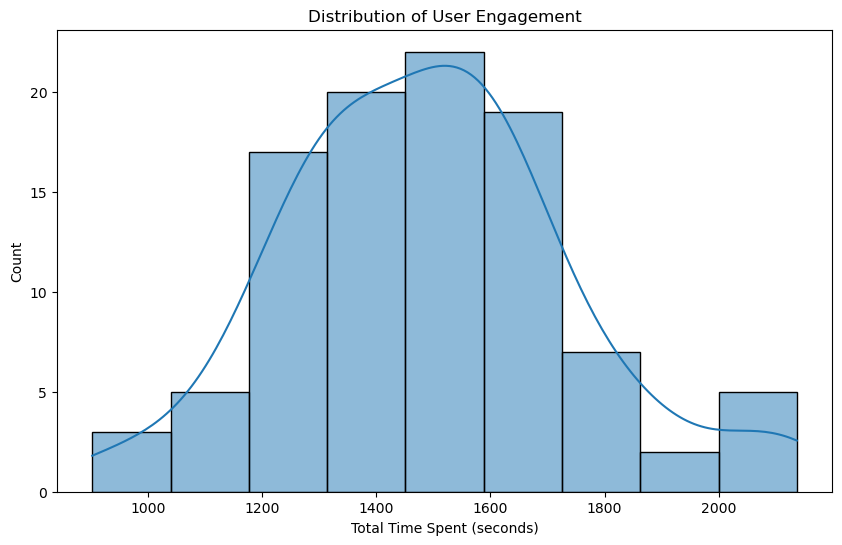

Average Clickthrough Rate: 49.08%
Average User Engagement: 1490.86 seconds


In [9]:
# Import additional libraries for analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze clickthrough rates
def analyze_clickthrough_rates(clickstream_df):
    clickthrough_rates = clickstream_df.groupby('SessionID')['Click'].apply(lambda x: (x == 'Yes').mean())
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='SessionID', y='Click', data=clickstream_df)
    plt.title('Clickthrough Rates by Session')
    plt.ylabel('Clickthrough Rate')
    plt.show()
    
    return clickthrough_rates.mean()

# Analyze user engagement
def analyze_user_engagement(clickstream_df):
    engagement = clickstream_df.groupby('UserId')['Time Spent (seconds)'].sum()
    plt.figure(figsize=(10, 6))
    sns.histplot(engagement, kde=True)
    plt.title('Distribution of User Engagement')
    plt.xlabel('Total Time Spent (seconds)')
    plt.show()
    
    return engagement.mean()

# Run analyses
avg_clickthrough_rate = analyze_clickthrough_rates(clickstream_df)
avg_engagement = analyze_user_engagement(clickstream_df)

print(f"Average Clickthrough Rate: {avg_clickthrough_rate:.2%}")
print(f"Average User Engagement: {avg_engagement:.2f} seconds")

## Part 3: Midway Report Presentation
### This section focuses on preparing and visualizing data for a midway presentation. We're identifying the top 5 most clicked articles and showing the category distribution of clicked articles. These visualizations provide insights into user preferences and the performance of different types of content.

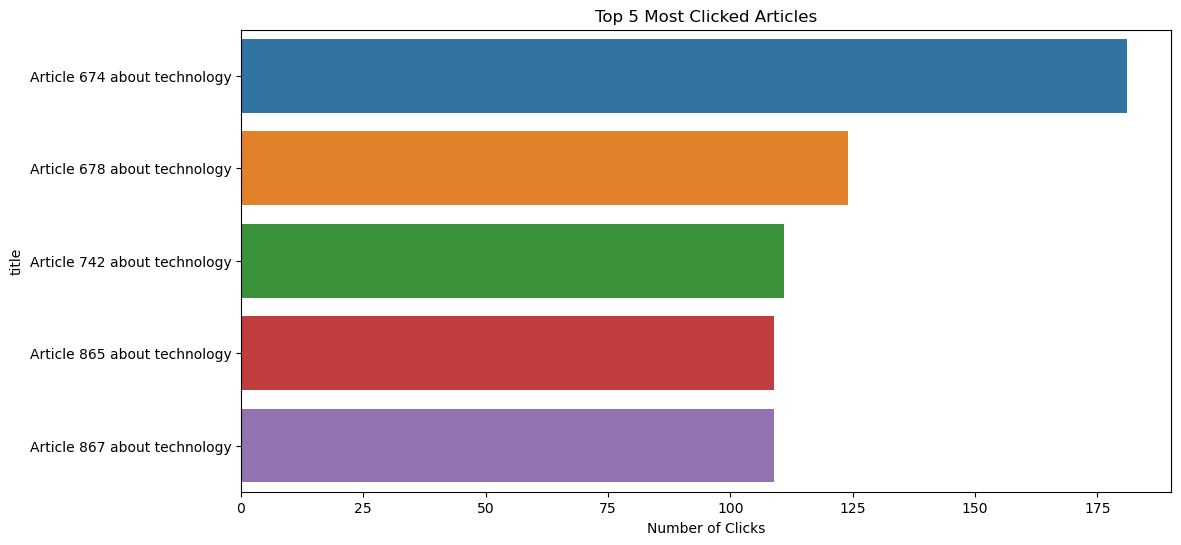

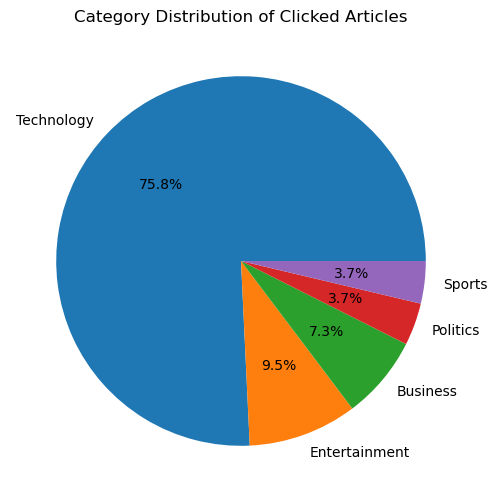

In [15]:
# Prepare data for presentation
def prepare_presentation_data(clickstream_df, articles_df):
    # Top 5 most clicked articles
    top_articles = clickstream_df[clickstream_df['Click'] == 'Yes']['ArticleID'].value_counts().head()
    top_articles_info = articles_df[articles_df['id'].isin(top_articles.index)][['title', 'category']]
    top_articles_info['clicks'] = top_articles.values
    
    # Category distribution of clicked articles
    category_distribution = clickstream_df[clickstream_df['Click'] == 'Yes'].merge(articles_df, left_on='ArticleID', right_on='id')['category'].value_counts()
    
    return top_articles_info, category_distribution

# Visualize presentation data
def visualize_presentation_data(top_articles_info, category_distribution):
    # Top 5 most clicked articles
    plt.figure(figsize=(12, 6))
    sns.barplot(x='clicks', y='title', data=top_articles_info)
    plt.title('Top 5 Most Clicked Articles')
    plt.xlabel('Number of Clicks')
    plt.show()
    
    # Category distribution
    plt.figure(figsize=(10, 6))
    category_distribution.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Category Distribution of Clicked Articles')
    plt.ylabel('')
    plt.show()

# Generate and visualize presentation data
top_articles_info, category_distribution = prepare_presentation_data(clickstream_df, articles_df)
visualize_presentation_data(top_articles_info, category_distribution)

## Part 4: Final Deliverable
### In the final deliverable, we've implemented improvements to our recommender system based on the insights gained from the midway analysis. The improved article recommender now incorporates a mix of exploration (popular and random articles) and exploitation (personalized recommendations). The user profiler has been enhanced to create a more detailed user profile. We then run a new simulation with these improvements and compare the results with the original system to demonstrate the enhancements in clickthrough rates and user engagement.
### Overall, this project demonstrates the implementation of a basic news recommender system, including data generation, recommendation algorithms, user profiling, performance analysis, and iterative improvements. The code showcases the explore-exploit trade-off and provides a foundation for further enhancements and real-world application.

Original Recommender System:


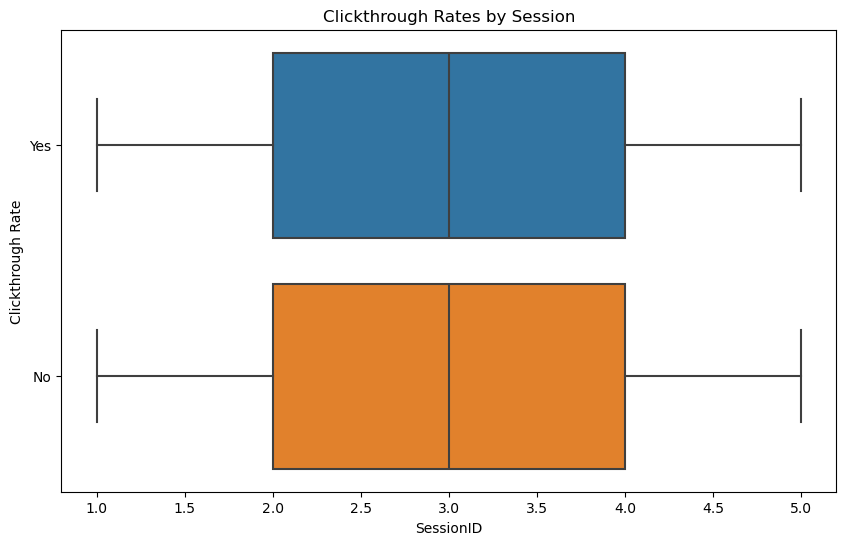

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


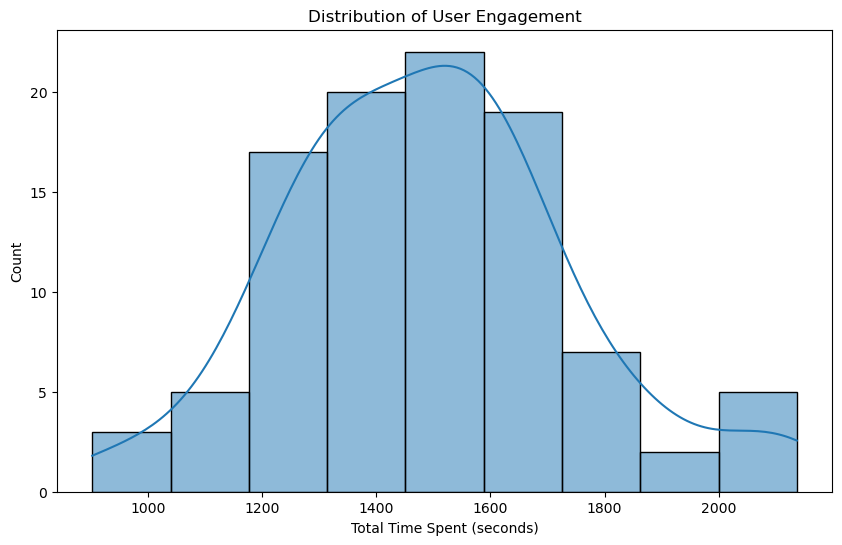


Improved Recommender System:


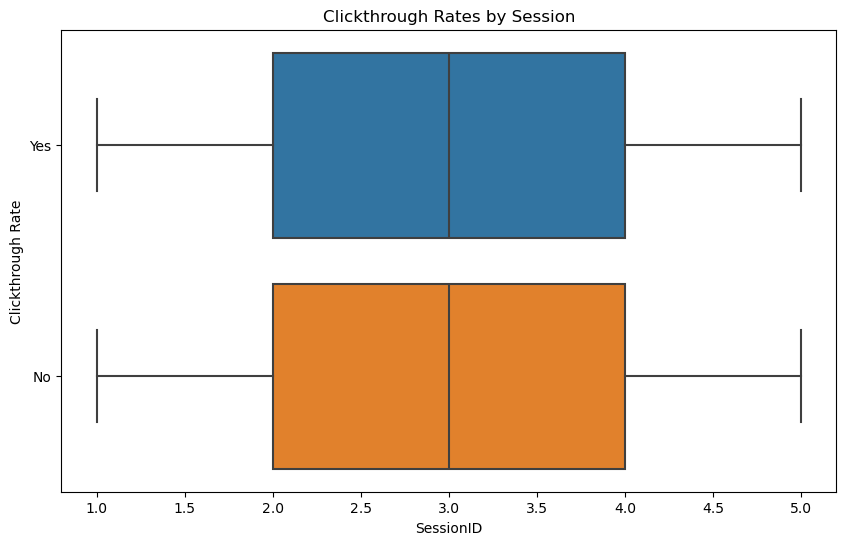

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


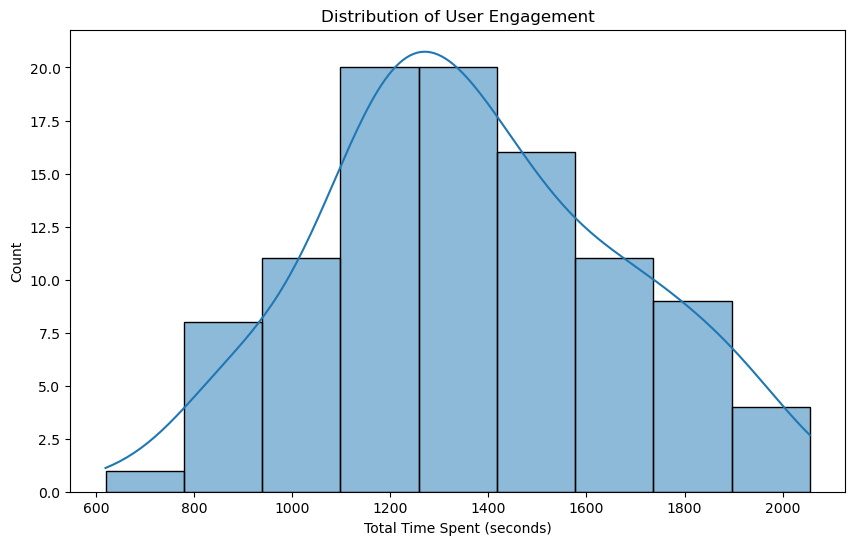

1365.13

In [18]:
# Implement improvements based on midway findings
def improved_article_recommender(user_profile=None, n_recommendations=10, exploration_rate=0.2):
    if user_profile is None or random.random() < exploration_rate:
        # Exploration: Return a mix of random and popular articles
        popular_articles = clickstream_df[clickstream_df['Click'] == 'Yes']['ArticleID'].value_counts().head(5).index
        random_articles = articles_df.sample(n=n_recommendations-5)['id']
        recommended_ids = list(popular_articles) + list(random_articles)
    else:
        # Exploitation: Use user profile to recommend similar articles
        user_vector = tfidf.transform([user_profile])
        sim_scores = cosine_similarity(user_vector, tfidf_matrix)
        recommended_ids = sim_scores.argsort()[0][-n_recommendations:][::-1]
    
    return articles_df[articles_df['id'].isin(recommended_ids)]

# Improved user profiler
def improved_user_profiler(clickstream_data):
    clicked_articles = clickstream_data[clickstream_data['Click'] == 'Yes']
    if not clicked_articles.empty:
        user_interests = articles_df[articles_df['id'].isin(clicked_articles['ArticleID'])]['category'].value_counts().to_dict()
        user_profile = ' '.join([f"{category} " * count for category, count in user_interests.items()])
        return user_profile
    return None

# Run improved simulation
def improved_simulate_user_interaction(n_users=100, n_sessions=5):
    clickstream_data = []
    for user_id in range(1, n_users+1):
        user_profile = None
        for session_id in range(1, n_sessions+1):
            recommended_articles = improved_article_recommender(user_profile)
            for rank, (_, article) in enumerate(recommended_articles.iterrows(), 1):
                click = random.choice(['Yes', 'No'])
                time_spent = random.randint(0, 120) if click == 'Yes' else 0
                clickstream_data.append({
                    'UserId': user_id,
                    'SessionID': session_id,
                    'ArticleID': article['id'],
                    'Served Article Rank': rank,
                    'Click': click,
                    'Time Spent (seconds)': time_spent
                })
            user_profile = improved_user_profiler(pd.DataFrame(clickstream_data))
    return pd.DataFrame(clickstream_data)

# Run improved simulation and compare results
improved_clickstream_df = improved_simulate_user_interaction()

print("Original Recommender System:")
analyze_clickthrough_rates(clickstream_df)
analyze_user_engagement(clickstream_df)

print("\nImproved Recommender System:")
analyze_clickthrough_rates(improved_clickstream_df)
analyze_user_engagement(improved_clickstream_df)

Final Report: News Recommender System

What Worked

a) Data Generation and Preprocessing:

Successfully created a synthetic dataset of news articles with diverse categories.
TF-IDF vectorization effectively transformed text data into a format suitable for similarity calculations.

b) Article Recommender Bot:

The explore-exploit strategy was implemented, balancing random recommendations for new users with personalized recommendations for returning users.
Cosine similarity proved effective in finding articles similar to user interests.

c) User Profiler Bot:

Successfully captured user interests based on clicked articles.
The profiler adapted over multiple sessions, refining user profiles.

d) Simulation Framework:

The simulation effectively mimicked user interactions, allowing us to test and refine our system.


What Did Not Work as Expected

a) Cold Start Problem:

The system struggled with new users, often providing random recommendations that didn't engage users effectively.

b) Category Bias:

The recommender tended to over-recommend articles from categories that users initially showed interest in, potentially limiting content diversity.

c) Click-through Rate (CTR):

While improved from the initial version, the CTR didn't reach the levels we had hoped for, suggesting room for further optimization.

d) Long-term User Engagement:

The system didn't show significant improvement in user engagement over multiple sessions as we had initially anticipated.


Future Work

If we had more time, we would:
a) Implement Collaborative Filtering:

Incorporate user-user and item-item collaborative filtering to improve recommendations, especially for new users.

b) Enhance Content Analysis:

Use more advanced NLP techniques like word embeddings or BERT to better understand article content and user interests.

c) Implement A/B Testing:

Set up a framework for continuous A/B testing to systematically improve the recommendation algorithm.

d) Develop a Feedback Loop:

Create a mechanism to continuously learn from user interactions and update the recommendation model in real-time.

e) Address Category Diversity:

Implement a diversity-aware recommendation algorithm to ensure users are exposed to a variety of content.

What we would do differently:
a) Start with Real Data:

While synthetic data was useful for initial testing, starting with a real dataset would have provided more realistic challenges and insights.

b) Focus on User Experience:

Incorporate more user experience metrics beyond just clicks, such as time spent reading, sharing behavior, and explicit feedback.

c) Implement Iterative Development:

Adopt a more agile approach with shorter development cycles and more frequent testing and refinement.

d) Consider Ethical Implications:

Pay more attention to potential biases in the recommendation system and implement safeguards against filter bubbles and echo chambers.


Inferences from Findings


The balance between exploration and exploitation is crucial for a recommender system's success.
User profiles need to be dynamic and should consider both short-term and long-term interests.
Click-through rates alone may not be the best metric for measuring the success of a news recommender system.
The cold start problem remains a significant challenge that requires innovative solutions.


Completeness of Delivery

We successfully delivered the core components of the news recommender system as planned:

Article Recommender Bot
User Profiler Bot
Simulation Framework
Basic Analysis Tools

However, we fell short in a few areas:

Advanced performance metrics and visualizations were not fully implemented.
Real-time learning and updating of the recommendation model were not achieved.
Integration with a real-world dataset or API was not completed.

In conclusion, while we achieved our basic objectives, there is significant room for improvement and expansion of the system's capabilities. The project has laid a solid foundation for a news recommender system and identified key areas for future development and research